# Feature Engineering

In [5]:
import os
import pickle
from PIL import Image
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


## HOG Features

* TLDR: These features describes the image in terms of its edges direction and magnitude in a localised area of 8 x 8 pixels (see image below)
* More detailed explanation here: https://www.analyticsvidhya.com/blog/2019/09/feature-engineering-images-introduction-hog-feature-descriptor/ 

Shape of Image Features: (1764,)


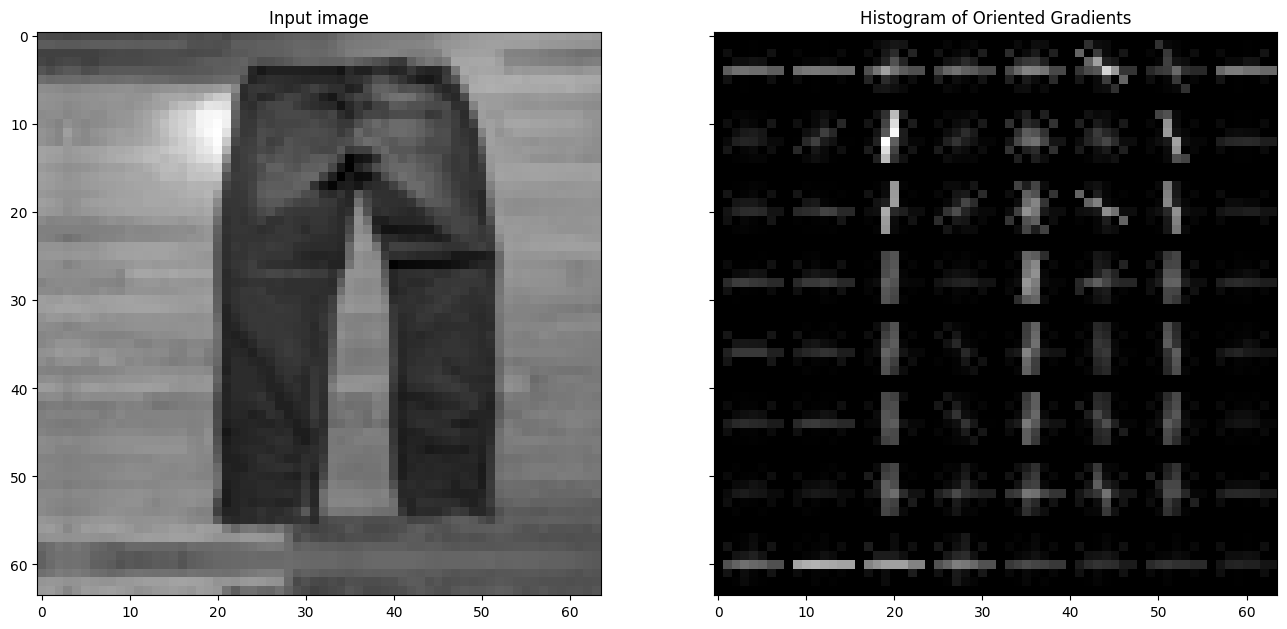

In [13]:
#reading the image
img = Image.open('dataset/train/bottoms/bottom_0001_augmented_0.jpeg')
img.show(img)

#resize image
img = img.resize((64, 64)) 

# Convert to black and white
img = img.convert("L")

# Normalize pixel values (0 to 1)
img = np.array(img) / 255.0

#generating HOG features
fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),
cells_per_block=(2, 2), visualize=True)

print(f'Shape of Image Features: {fd.shape}')

# Visualising results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

ax2.imshow(hog_image, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()


In [18]:
data_paths = [os.path.join("dataset","train"), os.path.join("dataset", "test")]
categories = ["tops", "bottoms", "bags", "shoes", "others"]

train_labels_df = pd.read_csv("train_labels.csv")
test_labels_df = pd.read_csv("test_labels.csv")

X_data_train = []
y_data_train = []

X_data_test = []
y_data_test = []

for data_path in data_paths:
    for i, category in enumerate(categories):
        cat_path = os.path.join(data_path, category)
        for filename in os.listdir(cat_path):
            img_path = os.path.join(cat_path, filename)

            try:
                img = Image.open(img_path)
            except Exception as e:
                print(f"Error processing image '{img_path}': {e}")
                continue

            #resize image
            img = img.resize((64, 64)) 

            # Convert to black and white
            img = img.convert("L")

            # Normalize pixel values (0 to 1)
            img = np.array(img) / 255.0

            #generating HOG features
            fd = hog(img, orientations=9, pixels_per_cell=(8, 8),
            cells_per_block=(2, 2), visualize=False)

            if "train" in data_path:
                X_data_train.append(fd)
                label = train_labels_df[train_labels_df["File_Path"] == f"train/{filename}"]["Label"].iloc[0]
                y_data_train.append(label)

            elif "test" in data_path:
                X_data_test.append(fd)
                label = test_labels_df[test_labels_df["File_Path"] == f"test/{filename}"]["Label"].iloc[0]
                y_data_test.append(label)

# Convert lists to np arrays
X_train = np.array(X_data_train)
y_train = np.array(y_data_train)

X_test = np.array(X_data_test)
y_test = np.array(y_data_test)

train_df = pd.DataFrame(data=X_train, columns=[f"hog_{i}" for i in range(X_train.shape[1])])
train_df['label'] = y_train

test_df = pd.DataFrame(data=X_test, columns=[f"hog_{i}" for i in range(X_test.shape[1])])
test_df['label'] = y_test

with open("preprocessed_data/hog_train_df.pkl", "wb") as f:
    pickle.dump(train_df, f)

with open("preprocessed_data/hog_test_df.pkl", "wb") as f:
    pickle.dump(test_df, f)

In [19]:
train_df

,hog_0,hog_1,hog_2,hog_3,hog_4,hog_5,hog_6,hog_7,hog_8,hog_9,...,hog_1755,hog_1756,hog_1757,hog_1758,hog_1759,hog_1760,hog_1761,hog_1762,hog_1763,label
0,0.327083,0.327083,0.327083,0.232197,0.327083,0.000000,0.016523,0.000000,0.087853,0.056490,...,0.068242,0.130947,0.000000,0.000000,0.305955,0.270084,0.240149,0.083402,0.155446,top
1,0.280307,0.240201,0.078446,0.157264,0.280307,0.232587,0.025818,0.000000,0.196579,0.039850,...,0.268133,0.263579,0.166955,0.113202,0.045192,0.000000,0.000000,0.000000,0.074984,top
2,0.270567,0.270567,0.270567,0.217973,0.153743,0.037398,0.000000,0.026445,0.000000,0.165569,...,0.202338,0.000000,0.017884,0.000000,0.282284,0.282284,0.282284,0.158707,0.000000,top
3,0.147908,0.319117,0.319117,0.016322,0.140771,0.000000,0.000000,0.000000,0.038077,0.319117,...,0.304923,0.145303,0.304923,0.029250,0.304923,0.120928,0.099289,0.012159,0.000000,top
4,0.083716,0.077244,0.127760,0.085439,0.048194,0.000000,0.002953,0.000000,0.000000,0.031318,...,0.040014,0.338643,0.236095,0.030859,0.036203,0.000000,0.000000,0.000000,0.000000,top
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12461,0.301232,0.301232,0.301232,0.077529,0.189305,0.025789,0.020710,0.018731,0.026932,0.121277,...,0.293515,0.290158,0.012230,0.001674,0.230985,0.004736,0.002118,0.022442,0.000000,other
12462,0.210430,0.070069,0.000000,0.171437,0.117883,0.252411,0.249457,0.160717,0.135764,0.156574,...,0.263026,0.187057,0.263026,0.104577,0.263026,0.138561,0.156318,0.110966,0.170323,other
12463,0.164905,0.189688,0.047683,0.094203,0.167762,0.207361,0.161779,0.235065,0.138275,0.247805,...,0.226863,0.143826,0.241630,0.241630,0.195318,0.053796,0.205940,0.117387,0.193971,other
12464,0.147078,0.117304,0.156632,0.192907,0.239565,0.212323,0.100357,0.019533,0.143708,0.146808,...,0.097835,0.020382,0.017295,0.143990,0.175288,0.172530,0.119039,0.066902,0.000000,other


In [20]:
test_df

,hog_0,hog_1,hog_2,hog_3,hog_4,hog_5,hog_6,hog_7,hog_8,hog_9,...,hog_1755,hog_1756,hog_1757,hog_1758,hog_1759,hog_1760,hog_1761,hog_1762,hog_1763,label
0,0.015005,0.041416,0.075527,0.100834,0.240249,0.014775,0.023155,0.015383,0.005584,0.023597,...,0.037052,0.029571,0.000000,0.195927,0.276944,0.120758,0.033227,0.000000,0.000000,top
1,0.066453,0.003417,0.104613,0.046813,0.299030,0.130620,0.033799,0.051113,0.004832,0.070293,...,0.031932,0.028767,0.009294,0.100413,0.287004,0.173534,0.040296,0.003246,0.004590,top
2,0.019593,0.000000,0.000000,0.119524,0.164584,0.035526,0.016626,0.000000,0.000000,0.009797,...,0.170545,0.329813,0.329813,0.113699,0.236733,0.000000,0.013808,0.000000,0.000000,top
3,0.209653,0.017259,0.141904,0.080923,0.405932,0.017259,0.049661,0.017259,0.024408,0.138934,...,0.316619,0.159416,0.126030,0.019927,0.035647,0.000000,0.037809,0.059781,0.000000,top
4,0.082312,0.084324,0.180707,0.087390,0.039815,0.013412,0.010898,0.000000,0.026487,0.071533,...,0.334550,0.334550,0.035477,0.055343,0.058027,0.006796,0.000000,0.000000,0.000000,top
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,0.246757,0.196278,0.130946,0.246757,0.246757,0.126841,0.083630,0.060498,0.000000,0.246757,...,0.220298,0.043785,0.118070,0.098145,0.174693,0.033273,0.074487,0.041174,0.013782,other
241,0.052337,0.017049,0.136879,0.057629,0.131085,0.130047,0.107192,0.151079,0.100742,0.058831,...,0.128793,0.048553,0.001453,0.241080,0.330418,0.095115,0.135995,0.112252,0.131759,other
242,0.256193,0.067880,0.000000,0.000000,0.256193,0.256193,0.256193,0.217415,0.129935,0.226251,...,0.089015,0.071597,0.022776,0.228299,0.298578,0.199091,0.167397,0.122756,0.043390,other
243,0.260438,0.046036,0.203810,0.000000,0.260438,0.000000,0.145578,0.000000,0.000000,0.260438,...,0.256111,0.057818,0.247734,0.028909,0.256111,0.115636,0.138032,0.046614,0.040883,other
